<a href="https://colab.research.google.com/github/MLDreamer/AIMathematicallyexplained/blob/main/RAG_playground_with_Baye's_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proving RAG = Bayes' Theorem with Steve Jobs example
🔬 RAG = BAYES' THEOREM PROOF
Query: 'What company did Steve Jobs found in 1985?'
Correct Answer: NeXT 1985

📊 Biased Prior (RAG Fails)
Priors: {'Apple 1976': 0.85, 'NeXT 1985': 0.1, 'Pixar 1986': 0.05}
Likelihoods: {'Apple 1976': 0.15, 'NeXT 1985': 0.9, 'Pixar 1986': 0.05}
Posteriors: {'Apple 1976': 0.5795454545454546, 'NeXT 1985': 0.4090909090909091, 'Pixar 1986': 0.011363636363636366}
Result: Apple 1976 (58.0%) ❌

📊 Balanced Prior (RAG Works)
Priors: {'Apple 1976': 0.4, 'NeXT 1985': 0.35, 'Pixar 1986': 0.25}
Likelihoods: {'Apple 1976': 0.15, 'NeXT 1985': 0.9, 'Pixar 1986': 0.05}
Posteriors: {'Apple 1976': 0.15483870967741933, 'NeXT 1985': 0.8129032258064516, 'Pixar 1986': 0.03225806451612903}
Result: NeXT 1985 (81.3%) ✅

📊 Bad Retrieval (RAG Disaster)
Priors: {'Apple 1976': 0.4, 'NeXT 1985': 0.35, 'Pixar 1986': 0.25}
Likelihoods: {'Apple 1976': 0.95, 'NeXT 1985': 0.05, 'Pixar 1986': 0.1}
Posteriors: {'Apple 1976': 0.899408284023668

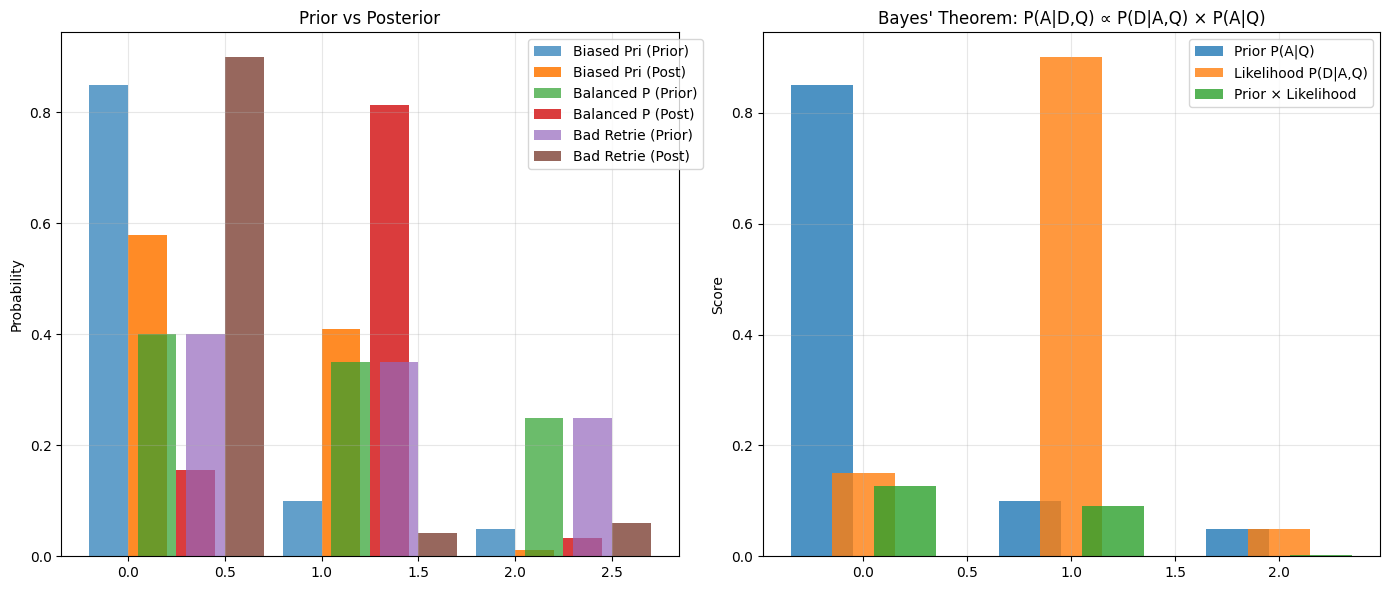


🎚️ TWO-LEVER THEOREM
RAG can only improve via: (1) Better priors OR (2) Better likelihoods

Baseline        → Apple      (93.6%) ❌
Better Priors   → Apple      (64.9%) ❌
Better Likelihoods → NeXT       (51.4%) ✅
Both Better     → NeXT       (88.7%) ✅

🎯 Thomas Bayes (1763) > Silicon Valley (2024)


In [1]:
"""
RAG = Bayes' Theorem: Mathematical Proof Implementation
=====================================================
P(Answer|Document,Query) = P(Document|Answer,Query) × P(Answer|Query)

Author: [Your Name]
Medium: [Medium Link] | Substack: [Substack Link]
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, List, Tuple

class BayesianRAG:
    def bayesian_update(self, priors: Dict, likelihoods: Dict) -> Dict:
        unnormalized = {a: priors[a] * likelihoods[a] for a in priors}
        total = sum(unnormalized.values())
        return {a: p/total for a, p in unnormalized.items()} if total > 0 else priors

    def get_best_answer(self, posteriors: Dict) -> Tuple[str, float]:
        best = max(posteriors, key=posteriors.get)
        return best, posteriors[best]

def steve_jobs_examples():
    """The canonical RAG = Bayes proof"""

    answers = ["Apple 1976", "NeXT 1985", "Pixar 1986"]
    document = "Steve Jobs founded NeXT Inc. in 1985 after leaving Apple."

    examples = [
        {
            "name": "Biased Prior (RAG Fails)",
            "priors": {"Apple 1976": 0.85, "NeXT 1985": 0.10, "Pixar 1986": 0.05},
            "likelihoods": {"Apple 1976": 0.15, "NeXT 1985": 0.90, "Pixar 1986": 0.05}
        },
        {
            "name": "Balanced Prior (RAG Works)",
            "priors": {"Apple 1976": 0.40, "NeXT 1985": 0.35, "Pixar 1986": 0.25},
            "likelihoods": {"Apple 1976": 0.15, "NeXT 1985": 0.90, "Pixar 1986": 0.05}
        },
        {
            "name": "Bad Retrieval (RAG Disaster)",
            "priors": {"Apple 1976": 0.40, "NeXT 1985": 0.35, "Pixar 1986": 0.25},
            "likelihoods": {"Apple 1976": 0.95, "NeXT 1985": 0.05, "Pixar 1986": 0.10}
        }
    ]

    return examples

def run_analysis():
    rag = BayesianRAG()
    examples = steve_jobs_examples()

    print("🔬 RAG = BAYES' THEOREM PROOF")
    print("Query: 'What company did Steve Jobs found in 1985?'")
    print("Correct Answer: NeXT 1985\n")

    results = []
    for ex in examples:
        posteriors = rag.bayesian_update(ex["priors"], ex["likelihoods"])
        best_answer, confidence = rag.get_best_answer(posteriors)
        correct = "NeXT" in best_answer

        print(f"📊 {ex['name']}")
        print(f"Priors: {ex['priors']}")
        print(f"Likelihoods: {ex['likelihoods']}")
        print(f"Posteriors: {posteriors}")
        print(f"Result: {best_answer} ({confidence:.1%}) {'✅' if correct else '❌'}\n")

        results.append({
            'Example': ex['name'],
            'Winner': best_answer,
            'Confidence': f"{confidence:.1%}",
            'Correct': '✅' if correct else '❌'
        })

    df = pd.DataFrame(results)
    print("SUMMARY:")
    print(df.to_string(index=False))

    return examples, results

def plot_results(examples):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Plot 1: Prior vs Posterior
    rag = BayesianRAG()
    for i, ex in enumerate(examples):
        posteriors = rag.bayesian_update(ex["priors"], ex["likelihoods"])

        answers = list(ex["priors"].keys())
        priors = list(ex["priors"].values())
        posts = list(posteriors.values())

        x = np.arange(len(answers)) + i*0.25
        ax1.bar(x-0.1, priors, 0.2, label=f"{ex['name'][:10]} (Prior)", alpha=0.7)
        ax1.bar(x+0.1, posts, 0.2, label=f"{ex['name'][:10]} (Post)", alpha=0.9)

    ax1.set_title('Prior vs Posterior')
    ax1.set_ylabel('Probability')
    ax1.legend(bbox_to_anchor=(1.05, 1))
    ax1.grid(alpha=0.3)

    # Plot 2: Mathematical relationship
    ex = examples[0]  # Use first example
    answers = list(ex["priors"].keys())
    priors = np.array(list(ex["priors"].values()))
    likes = np.array(list(ex["likelihoods"].values()))
    unnorm = priors * likes

    x = np.arange(len(answers))
    ax2.bar(x-0.2, priors, 0.3, label='Prior P(A|Q)', alpha=0.8)
    ax2.bar(x+0.0, likes, 0.3, label='Likelihood P(D|A,Q)', alpha=0.8)
    ax2.bar(x+0.2, unnorm, 0.3, label='Prior × Likelihood', alpha=0.8)

    ax2.set_title('Bayes\' Theorem: P(A|D,Q) ∝ P(D|A,Q) × P(A|Q)')
    ax2.set_ylabel('Score')
    ax2.legend()
    ax2.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

def demonstrate_two_levers():
    print("\n🎚️ TWO-LEVER THEOREM")
    print("RAG can only improve via: (1) Better priors OR (2) Better likelihoods\n")

    rag = BayesianRAG()
    scenarios = [
        ("Baseline", {"Apple": 0.85, "NeXT": 0.10, "Pixar": 0.05},
                    {"Apple": 0.6, "NeXT": 0.3, "Pixar": 0.1}),
        ("Better Priors", {"Apple": 0.4, "NeXT": 0.35, "Pixar": 0.25},
                          {"Apple": 0.6, "NeXT": 0.3, "Pixar": 0.1}),
        ("Better Likelihoods", {"Apple": 0.85, "NeXT": 0.10, "Pixar": 0.05},
                               {"Apple": 0.1, "NeXT": 0.9, "Pixar": 0.0}),
        ("Both Better", {"Apple": 0.4, "NeXT": 0.35, "Pixar": 0.25},
                        {"Apple": 0.1, "NeXT": 0.9, "Pixar": 0.0})
    ]

    for name, priors, likes in scenarios:
        posts = rag.bayesian_update(priors, likes)
        best, conf = rag.get_best_answer(posts)
        correct = "NeXT" in best
        print(f"{name:15} → {best:10} ({conf:.1%}) {'✅' if correct else '❌'}")

def main():
    print("Proving RAG = Bayes' Theorem with Steve Jobs example")
    print("="*50)

    examples, results = run_analysis()

    print("\n🔬 MATHEMATICAL INSIGHTS:")
    print("• Example 1: Strong prior (0.85) beats good evidence (0.90 likelihood)")
    print("• Example 2: Balanced prior lets evidence dominate")
    print("• Example 3: Bad evidence amplifies wrong beliefs")
    print("\n✨ CONCLUSION: RAG = P(D|A,Q) × P(A|Q)")

    plot_results(examples)
    demonstrate_two_levers()

    print(f"\n🎯 Thomas Bayes (1763) > Silicon Valley (2024)")
    return examples

if __name__ == "__main__":
    examples = main()